<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

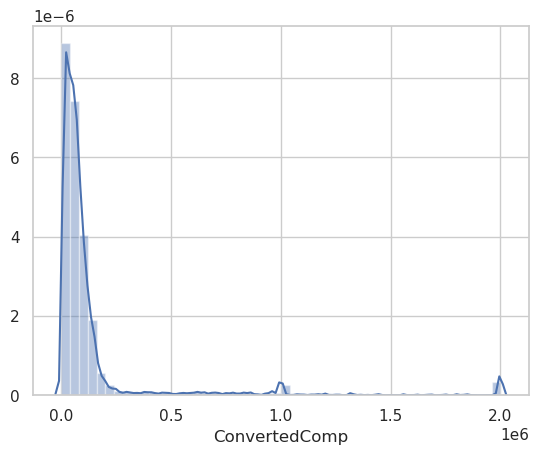

In [7]:
# your code goes here
import seaborn as sns 
sns.distplot(df['ConvertedComp'], kde = True)


Plot the histogram for the column `ConvertedComp`.


(array([9659.,  238.,  115.,  125.,   99.,  131.,   34.,   15.,   15.,
         151.]),
 array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000., 1600000., 1800000., 2000000.]),
 <BarContainer object of 10 artists>)

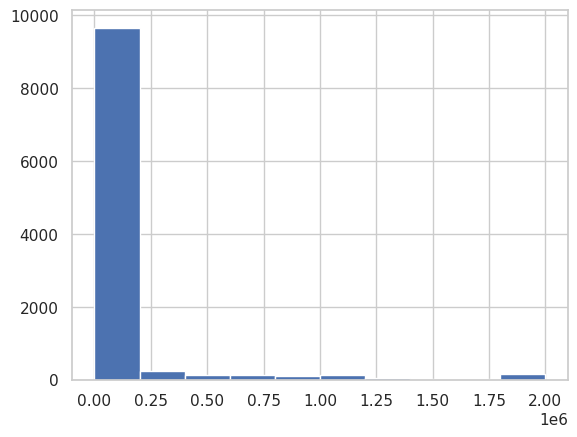

In [10]:
# your code goes here
import matplotlib as mpl
%matplotlib inline 
import matplotlib.pyplot as plt
plt.hist(df['ConvertedComp']) 

What is the median of the column `ConvertedComp`?


In [12]:
# your code goes here
import numpy as np
np.median(df['ConvertedComp'])

57745.0

How many responders identified themselves only as a **Man**?


In [19]:
# your code goes here
df["Gender"].value_counts()

Man                                                            9725
Woman                                                           679
Non-binary, genderqueer, or gender non-conforming                59
Man;Non-binary, genderqueer, or gender non-conforming            26
Woman;Non-binary, genderqueer, or gender non-conforming          14
Woman;Man                                                         7
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: Gender, dtype: int64

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [29]:
# your code goes here
Woman=df[df["Gender"]=='Woman']
np.median(Woman['ConvertedComp'])

57708.0

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [61]:
# your code goes here
np.mean(df)
#df['Age'].describe()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


Respondent        12501.548479
CompTotal        756810.372897
ConvertedComp    131596.731620
WorkWeekHrs          42.047969
CodeRevHrs            4.712925
Age                  30.833040
dtype: float64

In [57]:
df['Age'].value_counts()

28.0    729
25.0    678
26.0    675
27.0    663
29.0    652
       ... 
69.0      1
99.0      1
43.5      1
22.5      1
31.5      1
Name: Age, Length: 62, dtype: int64

Plot a histogram of the column `Age`.


(array([1.929e+03, 4.968e+03, 2.406e+03, 7.880e+02, 2.100e+02, 4.800e+01,
        4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([16. , 24.3, 32.6, 40.9, 49.2, 57.5, 65.8, 74.1, 82.4, 90.7, 99. ]),
 <BarContainer object of 10 artists>)

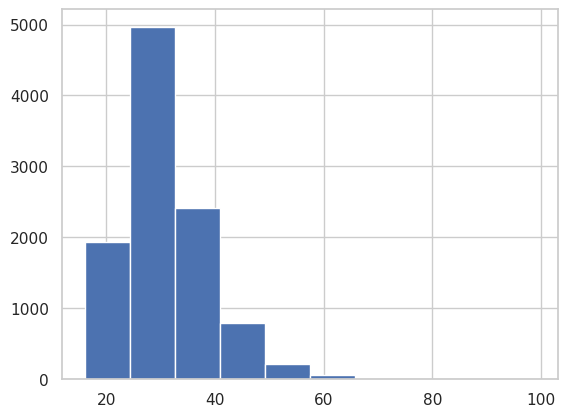

In [56]:
# your code goes here
import matplotlib as mpl
%matplotlib inline 
import matplotlib.pyplot as plt
plt.hist(df['Age'])

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:ylabel='ConvertedComp'>

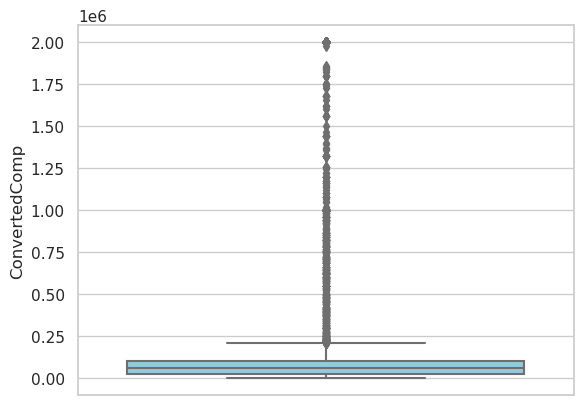

In [62]:
# your code goes here
sns.boxplot(data=df, y=df['ConvertedComp'], color='skyblue')


Find out the Inter Quartile Range for the column `ConvertedComp`.


In [40]:
# your code goes here
df['ConvertedComp'].dropna(axis=0,inplace=True) 
Q1,Q3=df['ConvertedComp'].quantile(.25),df['ConvertedComp'].quantile(.75)
IQR=Q3 - Q1
print('The Inter Quartile Range for ConvertedComp:', IQR)

The Inter Quartile Range for ConvertedComp: 73132.0


Find out the upper and lower bounds.


In [41]:
# your code goes here
upper=Q3+(IQR*1.5)
lower=Q1-(IQR*1.5)

print('Upper Bound:', upper)
print('Lower Bound:', lower)

Upper Bound: 209698.0
Lower Bound: -82830.0


Identify how many outliers are there in the `ConvertedComp` column.


In [42]:
# your code goes here
(df['ConvertedComp']<lower) | (df['ConvertedComp']>upper)


0        False
1        False
2        False
3         True
4        False
         ...  
11392    False
11393    False
11394    False
11395    False
11396    False
Name: ConvertedComp, Length: 10582, dtype: bool

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [43]:
# your code goes here
df2 = df['ConvertedComp'].clip(upper, lower)
df2.describe()

count     10582.000000
mean      72327.661406
std       58619.926538
min           0.000000
25%       26868.000000
50%       57745.000000
75%      100000.000000
max      209698.000000
Name: ConvertedComp, dtype: float64

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [47]:
# your code goes here
df.corr()

,Respondent,CompTotal,ConvertedComp,WorkWeekHrs,CodeRevHrs,Age
Respondent,1.000000,-0.013482,0.002181,-0.016178,0.007031,0.002394
CompTotal,-0.013482,1.000000,0.001037,0.003467,0.006698,0.006949
ConvertedComp,0.002181,0.001037,1.000000,0.021143,-0.033865,0.105386
WorkWeekHrs,-0.016178,0.003467,0.021143,1.000000,0.032463,0.031592
CodeRevHrs,0.007031,0.006698,-0.033865,0.032463,1.000000,-0.015742
Age,0.002394,0.006949,0.105386,0.031592,-0.015742,1.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
